In [15]:
import zipfile

In [16]:
DATA_IN_PATH = './txt_sim/'

file_list = ['train.csv.zip', 'test.csv.zip', 'sample_submission.csv.zip']
for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

#### Load Modules

In [17]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#### Data Check

In [18]:
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [19]:
# Data Size
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
sample_submission.csv         22.35MB
test.csv                      477.59MB
train.csv                     63.4MB


In [20]:
# Number of Train data
print('전체 학습데이터의 개수: {}'.format(len(train_data)))

전체 학습데이터의 개수: 404290


In [21]:
train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [22]:
print('교육 데이터의 총 질문 수: {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 질문의 수: {}'.format(np.sum(train_set.value_counts() > 1)))

교육 데이터의 총 질문 수: 537361
반복해서 나타나는 질문의 수: 111873


In [23]:
train_set.value_counts().index

Index(['What are the best ways to lose weight?',
       'How can you look at someone's private Instagram account without following them?',
       'How can I lose weight quickly?',
       'What's the easiest way to make money online?',
       'Can you see who views your Instagram?',
       'What are some things new employees should know going into their first day at AT&T?',
       'What do you think of the decision by the Indian Government to demonetize 500 and 1000 rupee notes?',
       'Which is the best digital marketing course?',
       'How can you increase your height?',
       'How do l see who viewed my videos on Instagram?',
       ...
       'What are the strongest majors in terms of job prospects and what are the weakest majors at Central Washington University?',
       'What is the process to hide a previous employment in India?',
       'How did hip-hop dance start?', 'How do I make a man happy?',
       'How do I get motivated to study?',
       'Should I buy my iPhone fro

Text(0, 0.5, 'Number of questions')

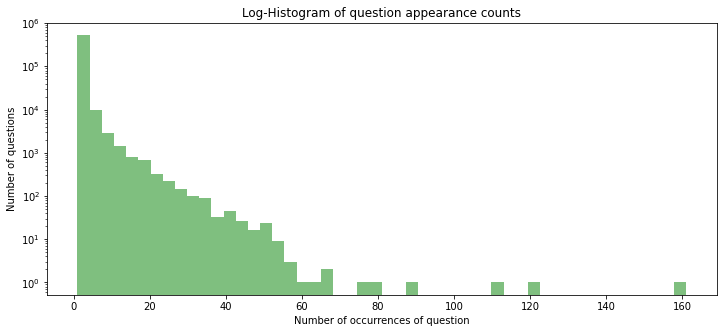

In [24]:
# Histogram
plt.figure(figsize=(12,5))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color='g', label='word')
plt.yscale('log', nonpositive='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurrences of question')
plt.ylabel('Number of questions')

In [25]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
print('제 1 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 161
중복 최소 개수: 1
중복 평균 개수: 1.50
중복 표준편차: 1.91
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1d281ac85b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d281b3cac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d281aca110>],
 'medians': [<matplotlib.lines.Line2D at 0x1d281b3f820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d281b3ee00>],
 'means': [<matplotlib.lines.Line2D at 0x1d281b3c910>]}

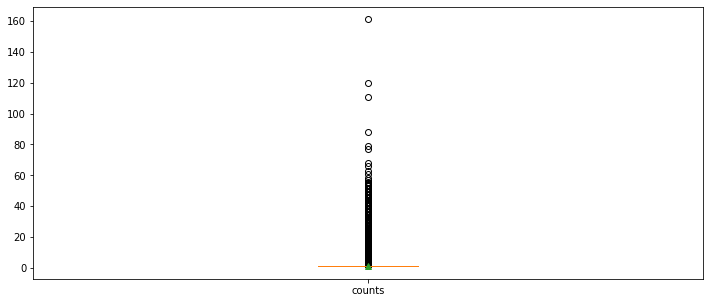

In [26]:
# Boxplot
plt.figure(figsize=(12, 5))
plt.boxplot([train_set.value_counts()],
             labels=['counts'],
             showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

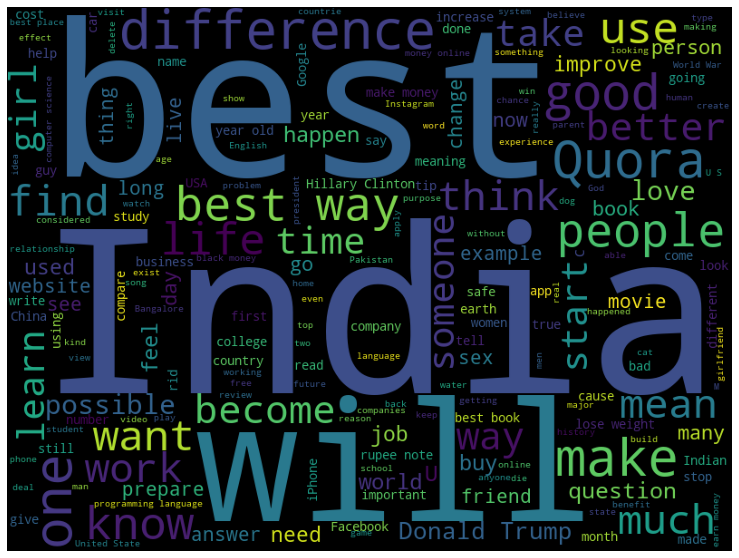

In [27]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_set.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
#### Number of Label Data

<AxesSubplot: xlabel='is_duplicate', ylabel='count'>

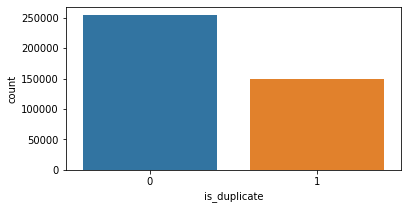

In [33]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(x=train_data['is_duplicate'])

In [34]:
print("라벨 0 질문 쌍 개수 : {}".format(train_data['is_duplicate'].value_counts()[0]))
print("라벨 1 질문 쌍 개수 : {}".format(train_data['is_duplicate'].value_counts()[1]))

라벨 0 질문 쌍 개수 : 255027
라벨 1 질문 쌍 개수 : 149263


In [ ]:
#### Length of questions

In [35]:
train_length = train_set.apply(len)

Text(0, 0.5, 'Probability')

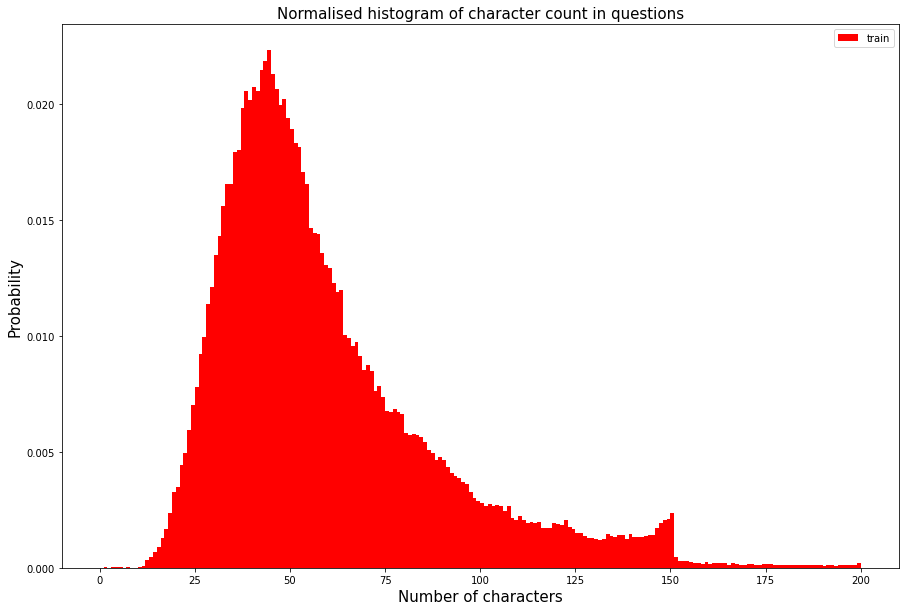

In [36]:
plt.figure(figsize=(15,10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', density=True, label='train')
plt.title("Normalised histogram of character count in questions", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [37]:
print('질문 길이 최대 값: {}'.format(np.max(train_length)))
print('질문 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('질문 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('질문 길이 중간 값: {}'.format(np.median(train_length)))
print('질문 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('질문 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

질문 길이 최대 값: 1169
질문 길이 평균 값: 59.82
질문 길이 표준편차: 31.96
질문 길이 중간 값: 51.0
질문 길이 제 1 사분위: 39.0
질문 길이 제 3 사분위: 72.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1d26d9017e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d26d902ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d26d894a30>],
 'medians': [<matplotlib.lines.Line2D at 0x1d26d903010>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d26d903550>],
 'means': [<matplotlib.lines.Line2D at 0x1d26d9032b0>]}

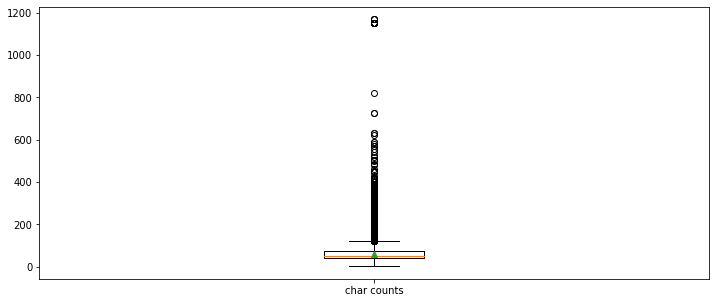

In [38]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_length,
             labels=['char counts'],
             showmeans=True)

In [ ]:
#### Number of words in question

In [39]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Prabability')

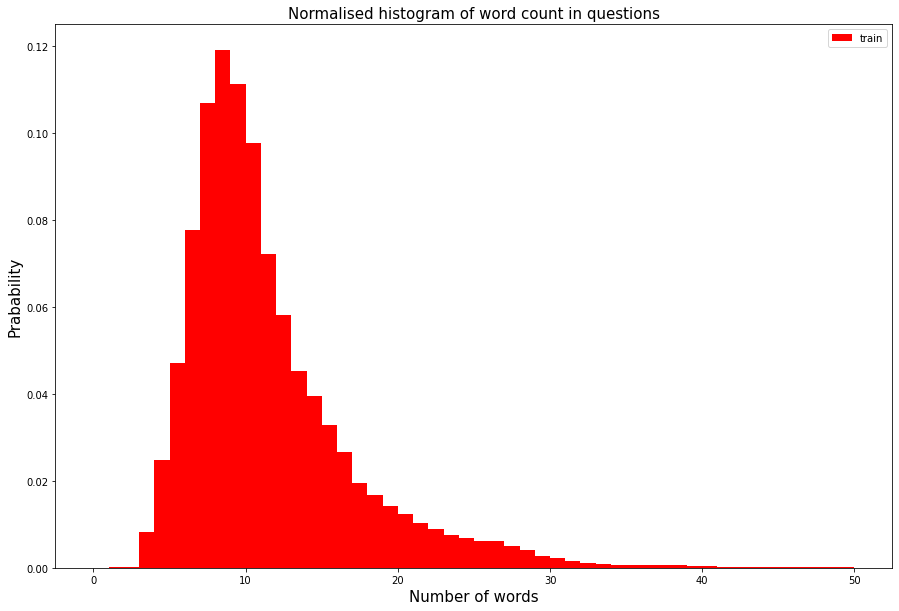

In [40]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', density=True, label='train')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Prabability', fontsize=15)

In [41]:
print('질문 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('질문 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('질문 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('질문 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('질문 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('질문 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('질문 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

질문 단어 개수 최대 값: 237
질문 단어 개수 평균 값: 11.06
질문 단어 개수 표준편차: 5.89
질문 단어 개수 중간 값: 10.0
질문 단어 개수 제 1 사분위: 7.0
질문 단어 개수 제 3 사분위: 13.0
질문 단어 개수 99 퍼센트: 31.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1d270462230>,
 'caps': [<matplotlib.lines.Line2D at 0x1d270462770>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d270461f90>],
 'medians': [<matplotlib.lines.Line2D at 0x1d270462b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d2704630d0>],
 'means': [<matplotlib.lines.Line2D at 0x1d270462e30>]}

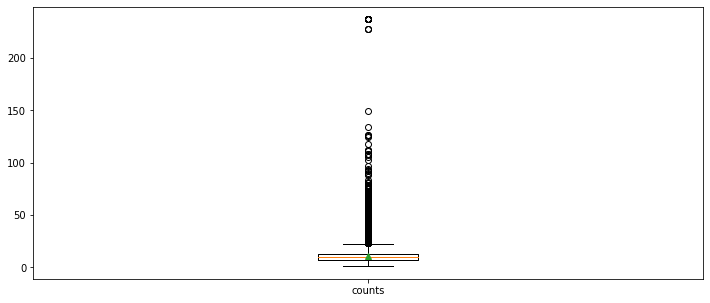

In [42]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_word_counts,
             labels=['counts'],
             showmeans=True)

### Symbols and Upper letters

In [46]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('수학 태그가있는 질문: {:.2f}%'.format(math * 100))
print('마침표를 포함한 질문: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))


물음표가있는 질문: 99.87%
수학 태그가있는 질문: 0.12%
마침표를 포함한 질문: 6.31%
첫 글자가 대문자 인 질문: 99.81%
대문자가있는 질문: 99.95%
숫자가있는 질문: 11.83%


#### Preprocessing

In [47]:
import pandas as pd
import numpy as np
import re
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [48]:
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv', encoding='utf-8')

In [49]:
train_pos_data = train_data.loc[train_data['is_duplicate'] == 1]
train_neg_data = train_data.loc[train_data['is_duplicate'] == 0]
print("<raw 라벨 당 데이터> ")
print("유사 문장 : {}".format(len(train_pos_data)))
print("무관 문장 : {}".format(len(train_neg_data)))

#sample_frac = len(train_pos_data) / len(train_neg_data)

#train_neg_data = train_neg_data.sample(frac = sample_frac)
train_neg_data = train_neg_data.sample(n=len(train_pos_data))
print("<processed 라벨 당 데이터> ")
print("유사 문장 : {}".format(len(train_pos_data)))
print("무관 문장 : {}".format(len(train_neg_data)))

<raw 라벨 당 데이터> 
유사 문장 : 149263
무관 문장 : 255027
<processed 라벨 당 데이터> 
유사 문장 : 149263
무관 문장 : 149263


In [50]:
train_data = pd.concat([train_neg_data, train_pos_data])

In [51]:
train_neg_data.shape

(149263, 6)

#### Sentence List about Question 1, 2

In [52]:
FILTERS = "[~.,!?\"':;)(]"
change_filter = re.compile(FILTERS)

In [53]:
questions1 = [str(s) for s in train_data['question1']]
questions2 = [str(s) for s in train_data['question2']]

filtered_questions1 = list()
filtered_questions2 = list()

for q in questions1:
     filtered_questions1.append(change_filter.sub("", q).lower())
        
for q in questions2:
     filtered_questions2.append(change_filter.sub("", q).lower())

In [54]:
# Tokenizing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(filtered_questions1 + filtered_questions2)

In [55]:
# Vectorizing
questions1_sequence = tokenizer.texts_to_sequences(filtered_questions1)
questions2_sequence = tokenizer.texts_to_sequences(filtered_questions2)

In [56]:
# Padding
MAX_SEQUENCE_LENGTH = 31
q1_data = pad_sequences(questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
q2_data = pad_sequences(questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

#### Save processed Data

In [57]:
word_vocab = {}
word_vocab = tokenizer.word_index 
word_vocab["<PAD>"] = 0

labels = np.array(train_data['is_duplicate'], dtype=int)

print('Shape of question1 data: {}'.format(q1_data.shape))
print('Shape of question2 data:{}'.format(q2_data.shape))
print('Shape of label: {}'.format(labels.shape))
print("Words in index: {}".format(len(word_vocab)))

Shape of question1 data: (298526, 31)
Shape of question2 data:(298526, 31)
Shape of label: (298526,)
Words in index: 76262


In [58]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [59]:
TRAIN_Q1_DATA = 'train_q1.npy'
TRAIN_Q2_DATA = 'train_q2.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

np.save(open(DATA_IN_PATH + TRAIN_Q1_DATA, 'wb'), q1_data)
np.save(open(DATA_IN_PATH + TRAIN_Q2_DATA , 'wb'), q2_data)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA , 'wb'), labels)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))

#### Preprocess for Test Data

In [60]:
test_data = pd.read_csv(DATA_IN_PATH + 'test.csv', encoding='utf-8')
# test_data = test_data.drop(test_data.tail(1217679).index,inplace=True) # drop last n rows
print(len(test_data))
valid_ids = [type(x) ==int for x in test_data.test_id] 
test_data = test_data[valid_ids].drop_duplicates()
print(len(test_data))

C:\Users\dhsmf\AppData\Local\Temp\ipykernel_24968\3700682295.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(DATA_IN_PATH + 'test.csv', encoding='utf-8')


3563475
2345796


In [61]:
test_data.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [62]:
FILTERS = "[~.,!?\"':;)(]"
change_filter = re.compile(FILTERS)

In [63]:
test_questions1 = [str(s) for s in test_data['question1']]
test_questions2 = [str(s) for s in test_data['question2']]

filtered_test_questions1 = list()
filtered_test_questions2 = list()

for q in test_questions1:
     filtered_test_questions1.append(change_filter.sub("", q).lower())
        
for q in test_questions2:
     filtered_test_questions2.append(change_filter.sub("", q).lower())

In [64]:
test_questions1_sequence = tokenizer.texts_to_sequences(filtered_test_questions1)
test_questions2_sequence = tokenizer.texts_to_sequences(filtered_test_questions2)

test_q1_data = pad_sequences(test_questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_q2_data = pad_sequences(test_questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [65]:
test_id = np.array(test_data['test_id'])

print('Shape of question1 data: {}'.format(test_q1_data.shape))
print('Shape of question2 data:{}'.format(test_q2_data.shape))
print('Shape of ids: {}'.format(test_id.shape))

Shape of question1 data: (2345796, 31)
Shape of question2 data:(2345796, 31)
Shape of ids: (2345796,)


In [66]:
TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_Q1_DATA, 'wb'), test_q1_data)
np.save(open(DATA_IN_PATH + TEST_Q2_DATA , 'wb'), test_q2_data)
np.save(open(DATA_IN_PATH + TEST_ID_DATA , 'wb'), test_id)